# Simulating $\pi$

The area of a circle $C$ is given as $|C| = \pi r^2$ with $r$ as the radius.

A square $S$ has area $|S| = w^2$ where $w$ is the length of a side of the square.

If we put a circle with radius $r$ inside of a square with edge $w=2r$ then the ratio of the areas is:

$$ratio = \frac{|C|}{|S|} = \frac{\pi r^2}{w^2} = \frac{\pi r^2}{(2r)^2} \frac{\pi r^2}{4r^2} = \frac{\pi}{4} $$

Thus if we multiply the ratio of the areas by 4 we have a formula for $pi$:
$$ \pi = 4 ratio$$ 
or
$$ \pi = 4\frac{|C|}{|S|}$$



We can use this relationship to simulate the ratio of the areas to generate an estimate of $\pi$.

Basically we take uniform random draws of an $x$ and $y$ coordinate for a point and look at the share of many such points that fall within the circle of all those that are in the square.

We want to get within $p=0.00001$ of the value of $\pi$ that is reported in Python and we are curious as to how many points we have to draw to achieve this level of accuracy.

In [8]:
import random
import math
import matplotlib.pyplot as plt

In [9]:
pi = math.pi # our benchmark that we want to estimate using simulation

In [10]:
pi

3.141592653589793

## random.random()
Return the next random floating point number in the range [0.0, 1.0).

https://docs.python.org/3/library/random.html (learn to check function documents is very important)

In [98]:
convergence_crit=0.1
how_many_draws = 1000
n = 0 # number of points falling in the unit circle
d = 0 # number of points falling in the unit square
simulating = True # use as a sentinel
while simulating:
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1./d
    print(ratio)
    if abs(ratio-pi) / pi * 100 <=  convergence_crit:
        print("We have reached the required convergence criterion of", convergence_crit, "% and therefore the draw is stopped at" ,d, "draws")
        break
    elif d == how_many_draws:
        left_to_go = round(abs(ratio-pi) / pi *100, 2)
        print( how_many_draws, " draws reached therefore draw limit exceeded and run stopped with", left_to_go, "% difference to actual pi value")
        break
    elif abs(ratio-pi) / pi <= 0.00001:
        print("Draws needed: ", d)
        break

4.0
4.0
4.0
3.0
3.2
3.3333333333333335
3.4285714285714284
3.5
3.5555555555555554
3.2
3.272727272727273
3.3333333333333335
3.3846153846153846
3.4285714285714284
3.466666666666667
3.25
3.2941176470588234
3.3333333333333335
3.3684210526315788
3.2
3.238095238095238
3.272727272727273
3.3043478260869565
3.3333333333333335
3.36
3.230769230769231
3.259259259259259
3.2857142857142856
3.310344827586207
3.3333333333333335
3.3548387096774195
3.375
3.393939393939394
3.411764705882353
3.4285714285714284
3.4444444444444446
3.4594594594594597
3.473684210526316
3.3846153846153846
3.4
3.4146341463414633
3.4285714285714284
3.3488372093023258
3.3636363636363638
3.3777777777777778
3.391304347826087
3.404255319148936
3.4166666666666665
3.4285714285714284
3.44
3.450980392156863
3.4615384615384617
3.4716981132075473
3.4814814814814814
3.4909090909090907
3.5
3.508771929824561
3.5172413793103448
3.5254237288135593
3.533333333333333
3.540983606557377
3.5483870967741935
3.5555555555555554
3.5625
3.569230769230769

In [77]:
n = 0
d = 0
ratios = []
xs = []
ys = []
simulating = True # use as a sentinel
while simulating:
    x = random.random()
    y = random.random()
    xs.append(x)
    ys.append(y)
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1./d
    
    print(ratio)
    ratios.append(ratio)
    if abs(ratio-pi) / pi <= 0.00001:
        print("Draws needed: ", d)
        break

4.0
4.0
4.0
4.0
4.0
3.3333333333333335
3.4285714285714284
3.5
3.5555555555555554
3.6
3.6363636363636362
3.3333333333333335
3.3846153846153846
3.4285714285714284
3.2
3.25
3.2941176470588234
3.3333333333333335
3.3684210526315788
3.4
3.4285714285714284
3.4545454545454546
3.4782608695652173
3.5
3.36
3.3846153846153846
3.4074074074074074
3.4285714285714284
3.310344827586207
3.3333333333333335
3.3548387096774195
3.375
3.393939393939394
3.411764705882353
3.3142857142857145
3.2222222222222223
3.2432432432432434
3.263157894736842
3.282051282051282
3.3
3.317073170731707
3.238095238095238
3.255813953488372
3.272727272727273
3.2888888888888888
3.217391304347826
3.234042553191489
3.25
3.2653061224489797
3.28
3.2941176470588234
3.3076923076923075
3.3207547169811322
3.3333333333333335
3.3454545454545452
3.357142857142857
3.2982456140350878
3.310344827586207
3.3220338983050848
3.3333333333333335
3.3442622950819674
3.3548387096774195
3.365079365079365
3.375
3.3846153846153846
3.393939393939394
3.343283

## Plot the first 10 $\pi$ estimation

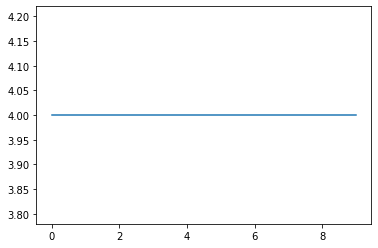

In [14]:
plt.plot(ratios[:10])

In [15]:
len(ratios)

11822

## Plot the first 500 $\pi$ estimation with min and max values of the estimation

(2.6666666666666665, 4.0)

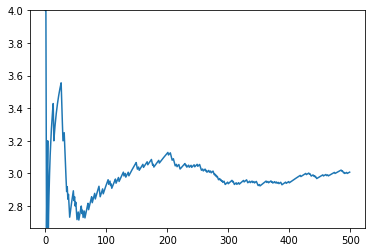

In [38]:
plt.plot(ratios[:500])
plt.ylim(min(ratios), max(ratios))

In [39]:
ratios[:10]

[4.0,
 4.0,
 2.6666666666666665,
 3.0,
 3.2,
 2.6666666666666665,
 2.857142857142857,
 3.0,
 3.111111111111111,
 3.2]

## Plot the entire $\pi$ estimation 

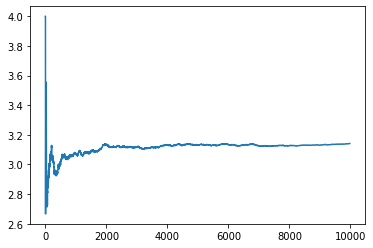

In [40]:
plt.plot(ratios)

## Getting User Input

In [3]:
input('enter')

enter 10


'10'

In [4]:
x = input('enter')

enter 100


In [5]:
x

'100'

In [6]:
type(x)

str

In [7]:
int(x)

100

In [8]:
float(x)

100.0

In [9]:
type(int(x))

int

In [10]:
type(float(x))

float

In [11]:
xf = float(x)

In [12]:
xf

100.0